# Global Peace Index 2023: Analyzing Top N Countries Based on Peacefulness Scores and Correlating Socio-economic and Political Factors

In [33]:
import csv
import matplotlib.pyplot as plt
import numpy as np

class Country:
    def __init__(self, name, iso3c, year, overall_score, safety_security, ongoing_conflict, militarization):
        self.name = name
        self.iso3c = iso3c
        self.year = year
        self.overall_score = overall_score
        self.safety_security = safety_security
        self.ongoing_conflict = ongoing_conflict
        self.militarization = militarization

In [34]:


def read_data(file_path):
    """Reads data from the CSV file and creates a list of Country objects."""
    countries = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            try:

                overall_score = float(row[3])
                country = Country(
                    row[0],         # name
                    row[1],         # iso3c
                    int(row[2]),    # year
                    overall_score,  # overall score
                    float(row[4]),  # safety and security
                    float(row[5]),  # ongoing conflict
                    float(row[6])   # militarization
                )
                countries.append(country)
            except ValueError:
                print(f"Skipping row due to invalid overall score: {row}")
                continue
    return countries

In [35]:
def filter_by_score(data, min_score, max_score):
    return [country for country in data if min_score <= country.overall_score <= max_score]

In [36]:
def calc_correlation(countries):
    correlations = {}
    for key in ['safety_security', 'ongoing_conflict', 'militarization']:
        values = [getattr(country, key) for country in countries]
        scores = [country.overall_score for country in countries]
        correlation = np.corrcoef(scores, values)[0, 1]
        correlations[key] = correlation
    return correlations

In [37]:
def quicksort(countries, descending=True):
    if len(countries) <= 1:
        return countries
    pivot = countries[len(countries) // 2]
    left = [x for x in countries if x.overall_score > pivot.overall_score] if descending else [x for x in countries if x.overall_score < pivot.overall_score]
    middle = [x for x in countries if x.overall_score == pivot.overall_score]
    right = [x for x in countries if x.overall_score < pivot.overall_score] if descending else [x for x in countries if x.overall_score > pivot.overall_score]
    return quicksort(left, descending) + middle + quicksort(right, descending)

In [38]:
def print_countries(countries, num_to_print):
    print(f"{'Country':<30} {'ISO3C':<10} {'Year':<5} {'Overall Score':<15} {'Safety & Security':<18} {'Ongoing Conflict':<18} {'Militarization':<15}")
    for i, country in enumerate(countries[:num_to_print], start=1):
        print(f"{country.name:<30} {country.iso3c:<10} {country.year:<5} {country.overall_score:<15.3f} {country.safety_security:<18.3f} {country.ongoing_conflict:<18.3f} {country.militarization:<15.3f}")

def print_correlations(correlations):
    print("\nCorrelations with Overall Peacefulness Score:")
    for key, value in correlations.items():
        print(f"{key.replace('_', ' ').capitalize():<20}: {value:.2f}")


In [39]:
def visualize_correlations(correlations):
    indicators = list(correlations.keys())
    correlation_values = list(correlations.values())
    plt.figure(figsize=(8, 5))
    plt.barh(indicators, correlation_values, color='skyblue')
    plt.xlabel('Correlation Coefficient')
    plt.title('Correlation between Peacefulness Scores and Indicators')
    plt.show()

def visualize_top_countries(countries, num_to_print, min_score, max_score):
    top_countries = [country.name for country in countries[:num_to_print]][::-1]
    top_scores = [country.overall_score for country in countries[:num_to_print]][::-1]

    plt.figure(figsize=(10, 7))
    plt.barh(top_countries, top_scores, color='darkgreen')
    plt.xlabel('Overall Peacefulness Score')
    plt.title(f'Top {num_to_print} Countries within Peacefulness Score Range [{min_score} to {max_score}]')
    plt.gca().invert_yaxis()
    plt.show()

Skipping row due to invalid overall score: ['Palestine', 'PSE', '2008', '', '0', '0', '0']
Skipping row due to invalid overall score: ['South Sudan', 'SSD', '2008', '', '0', '0', '0']
Enter a minimum peacefulness score: 2
Enter a maximum peacefulness score: 3

Number of countries within the range [2.0 to 3.0]: 64

How many countries would you like to print (up to 64)? 64

Correlations with Overall Peacefulness Score:
Safety security     : 0.56
Ongoing conflict    : 0.80
Militarization      : 0.58
Country                        ISO3C      Year  Overall Score   Safety & Security  Ongoing Conflict   Militarization 
Russia                         RUS        2008  2.915           3.308              2.142              3.352          
North Korea                    PRK        2008  2.840           2.778              2.409              3.627          
Israel                         ISR        2008  2.821           2.367              2.525              4.108          
Chad                      

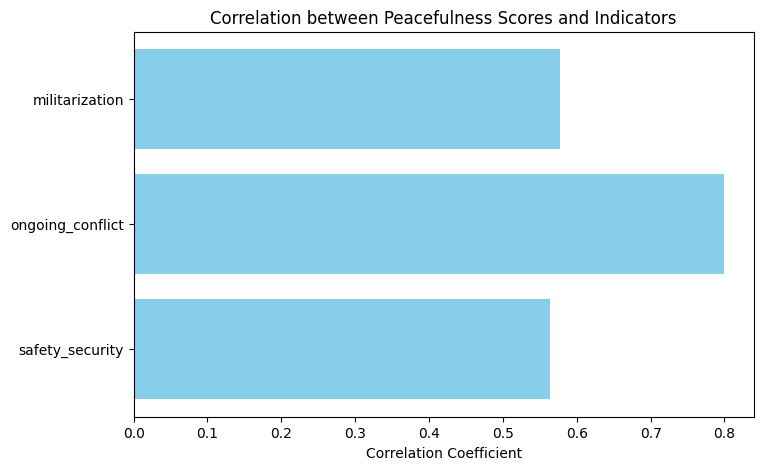

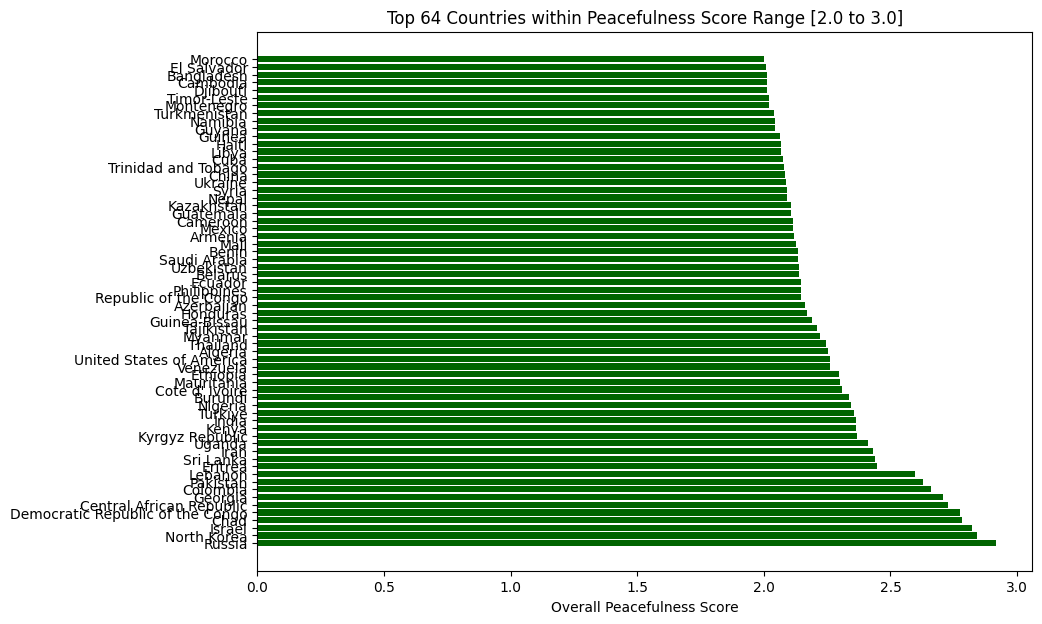

In [40]:
def main():
    file_path = 'global_peace_index_2023.csv'
    data = read_data(file_path)

    try:
        min_score = float(input("Enter a minimum peacefulness score: "))
        max_score = float(input("Enter a maximum peacefulness score: "))
    except ValueError:
        print("Please enter valid numeric values for the peacefulness score range.")
        return

    filtered_countries = filter_by_score(data, min_score, max_score)
    num_countries = len(filtered_countries)
    print(f"\nNumber of countries within the range [{min_score} to {max_score}]: {num_countries}\n")

    try:
        num_to_print = int(input(f"How many countries would you like to print (up to {num_countries})? "))
    except ValueError:
        print("Please enter a valid integer for the number of countries to print.")
        return

    if num_to_print < 1 or num_to_print > num_countries:
        print(f"Please enter a number between 1 and {num_countries}.")
        return

    correlations = calc_correlation(filtered_countries)
    print_correlations(correlations)
    sorted_countries = quicksort(filtered_countries, descending=True)
    print_countries(sorted_countries, num_to_print)
    visualize_correlations(correlations)
    visualize_top_countries(sorted_countries, num_to_print, min_score, max_score)

if __name__ == "__main__":
    main()
